In [ ]:
# 
# Data Import & Prep
#

In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
#Lavendar color for powerpoint #D7B9C4, blue color #AFD7E6

In [2]:
#Grab datafrom MongoDB and assign data to Pandas Dataframe
client = pymongo.MongoClient('localhost',27017)
db = client.poshmark_db
db.list_collection_names()

['sold_clutches']

In [3]:
#Find all documents in sold_clutches collection and assign documents to a list
coll = db.sold_clutches
docs = coll.find()
doclist = [listing for listing in docs]
len(doclist)

50847

In [4]:
#Create pandas datafram from doclist & get column names for future reference
df = pd.DataFrame(doclist)
df.columns

Index(['_id', 'brand', 'colors', 'comment_count', 'condition',
       'creator_handle', 'description', 'id', 'inventory_status_changed_dt',
       'like_count', 'og_price', 'sell_price', 'seller_offer', 'share_count',
       'title'],
      dtype='object')

In [5]:
#Apply data filters
#Create DF with examples that contain a condition that is not blank or == 'ret' 
# and original price between 25 and 5000 & sell price > 10 to remove outliers 
cond_df = df[df.condition != '']
cond_df = cond_df[cond_df.condition != 'ret']
cond_df = cond_df[cond_df.og_price >= 10]
cond_df = cond_df[cond_df.og_price <= 7000]
cond_df = cond_df[cond_df.sell_price >= 10]
cond_df['brand'] = cond_df['brand'].str.strip()
cond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19311 entries, 1 to 50844
Data columns (total 15 columns):
_id                            19311 non-null object
brand                          19311 non-null object
colors                         19311 non-null object
comment_count                  19311 non-null int64
condition                      19311 non-null object
creator_handle                 19311 non-null object
description                    19311 non-null object
id                             19311 non-null object
inventory_status_changed_dt    12620 non-null object
like_count                     19311 non-null int64
og_price                       19311 non-null float64
sell_price                     19311 non-null float64
seller_offer                   12620 non-null object
share_count                    19311 non-null int64
title                          19311 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 2.4+ MB


In [6]:
#List of brands
cond_df['brand'].unique()

array(['betsey johnson', 'fossil', 'guess', 'gucci', 'chanel', 'coach',
       'kate spade', 'rebecca minkoff', 'mossimo supply co.',
       'sole society', 'louis vuitton', 'steve madden'], dtype=object)

In [ ]:
#
# Data Exploration
#

Text(0,0.5,'Selling Price')

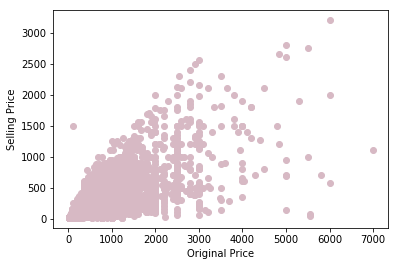

In [7]:
#Check correlation with scatterplot
plt.scatter(y=cond_df['sell_price'], x=cond_df['og_price'], color='#D7B9C4')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')

In [8]:
cond_df['sell_percent'] = cond_df['sell_price'] / cond_df['og_price']
low_sell_df = cond_df[['_id', 'brand', 'og_price', 'sell_price', 'condition', 'sell_percent']].copy()
low_sell_df = low_sell_df[low_sell_df.sell_percent < .10]
low_sell_df

,_id,brand,og_price,sell_price,condition,sell_percent
1,606b3a366b53b4fd918bf62e,betsey johnson,1234.0,20.0,nwt,0.016207
27,606b3a366b53b4fd918bf648,betsey johnson,999.0,25.0,not_nwt,0.025025
85,606b3a366b53b4fd918bf682,betsey johnson,1234.0,13.0,nwt,0.010535
164,606b3a366b53b4fd918bf6d1,betsey johnson,999.0,10.0,not_nwt,0.010010
582,606b3a366b53b4fd918bf873,betsey johnson,777.0,18.0,not_nwt,0.023166
599,606b3a366b53b4fd918bf884,betsey johnson,135.0,12.0,not_nwt,0.088889
888,606b3a366b53b4fd918bf9a5,betsey johnson,777.0,21.0,nwt,0.027027
903,606b3a366b53b4fd918bf9b4,betsey johnson,250.0,15.0,not_nwt,0.060000
1065,606b3a366b53b4fd918bfa56,betsey johnson,2222.0,20.0,nwt,0.009001
1194,606b3a366b53b4fd918bfad7,betsey johnson,999.0,19.0,nwt,0.019019


In [9]:
low_sell_df['sell_percent'].describe()

count    527.000000
mean       0.060627
std        0.026748
min        0.006301
25%        0.039254
50%        0.066667
75%        0.083333
max        0.099099
Name: sell_percent, dtype: float64

In [10]:
cond_df['sell_percent'].describe()

count    19311.000000
mean         0.380467
std          0.222262
min          0.006301
25%          0.238095
50%          0.346939
75%          0.500000
max         15.000000
Name: sell_percent, dtype: float64

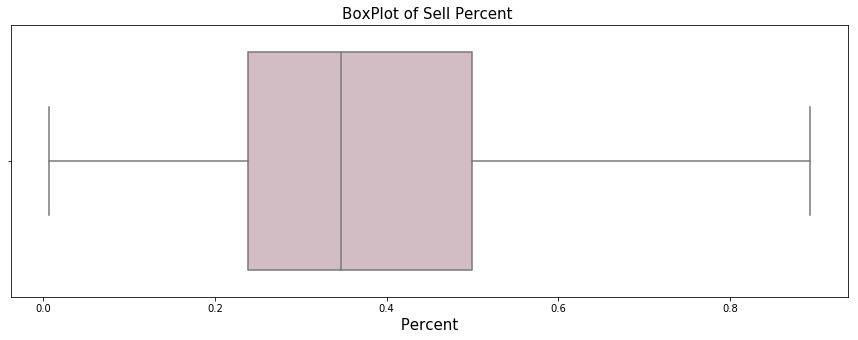

In [11]:
#Boxplot for selling percent
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_percent', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Percent ", fontsize=15)
plt.xlabel(' Percent ', fontsize=15)
plt.show()
#Most items sell for about 25% to about 55%, which is very common pricing for second-hand items
#Will filter the extremely low-priced items from the model, buyers can always give a discount or lower price if acitivity is low.

In [12]:
#Filter sell_percent items that are less thant 10%
cond_df = cond_df[cond_df.sell_percent > 0.1]
len(cond_df)

18699

Text(0,0.5,'Selling Price')

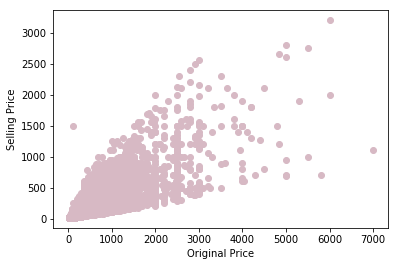

In [13]:
#Check correlation with scatterplot again
plt.scatter(y=cond_df['sell_price'], x=cond_df['og_price'], color='#D7B9C4')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')

In [14]:
#Grab descriptive stats for orginal and selling price
print(cond_df['og_price'].describe())
print('\n')
print(cond_df['sell_price'].describe())

count    18699.000000
mean       267.074603
std        476.333497
min         10.000000
25%         58.000000
50%         88.000000
75%        179.000000
max       6999.000000
Name: og_price, dtype: float64


count    18699.000000
mean       105.262634
std        208.259921
min         10.000000
25%         19.000000
50%         30.000000
75%         65.000000
max       3200.000000
Name: sell_price, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160941ED5C0>]],
      dtype=object)

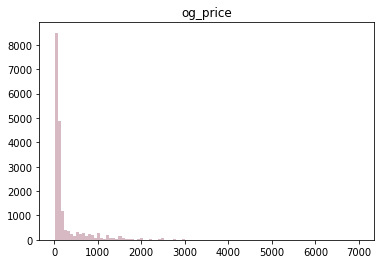

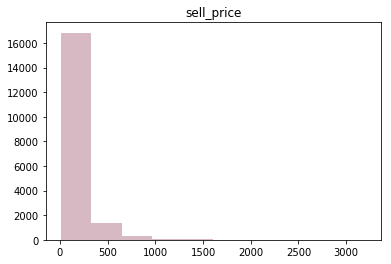

In [15]:
#Hist plosts for original and sell price
cond_df.hist(column='og_price', color='#D7B9C4', grid=False, bins=100)
cond_df.hist(column='sell_price', color='#D7B9C4', grid=False)
#Right-skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001608C495CF8>,
      dtype=object)

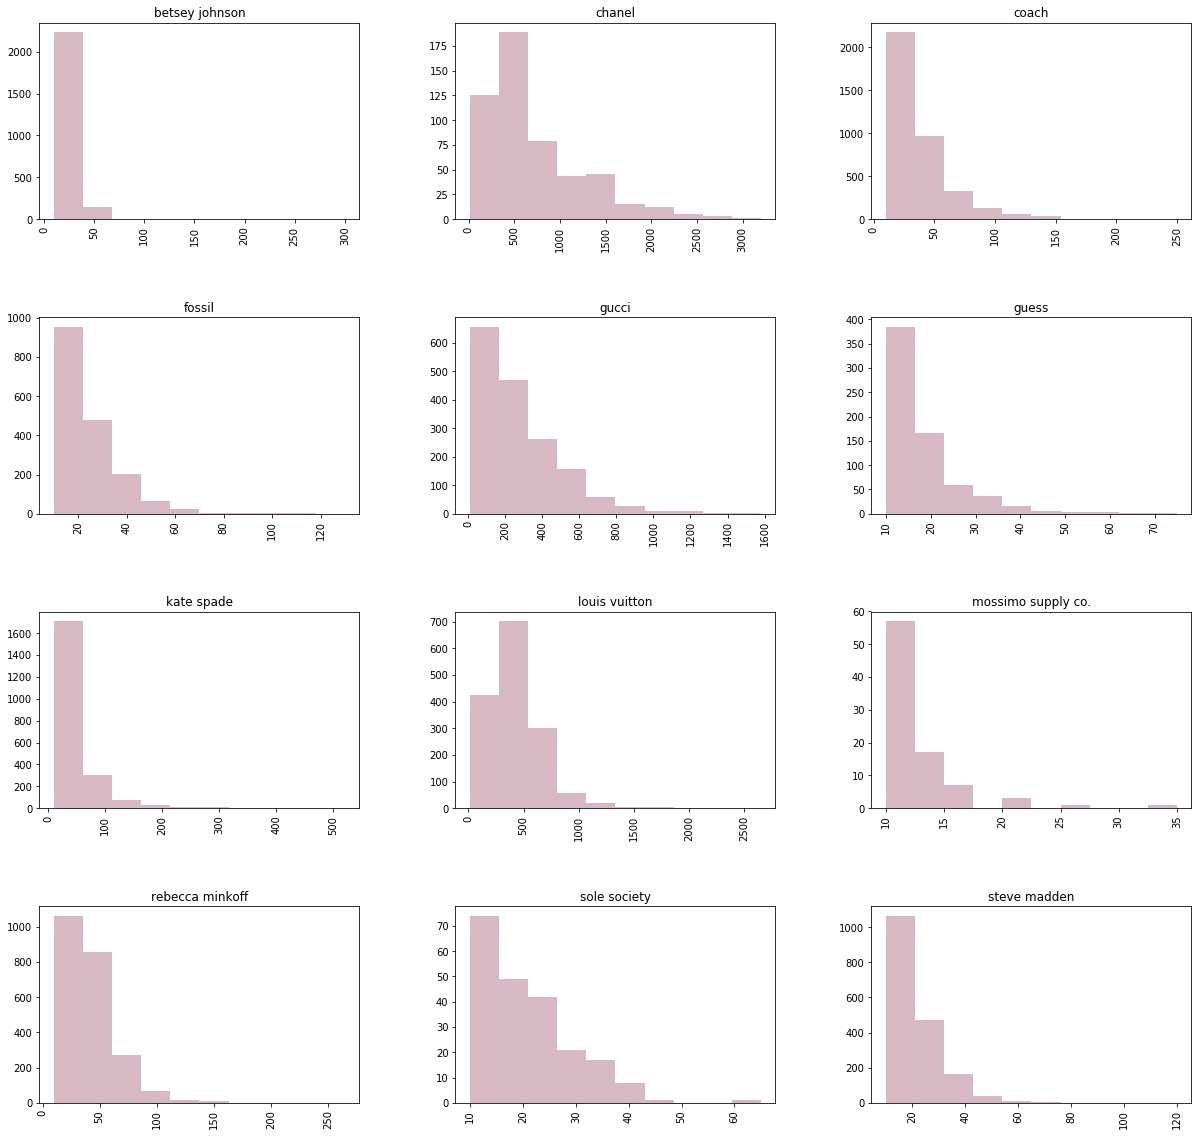

In [16]:
# Create separate hist plots for each brand to show the sell price distribution
cond_df.hist(column='sell_price', by = 'brand', color='#D7B9C4', figsize=(20,20))

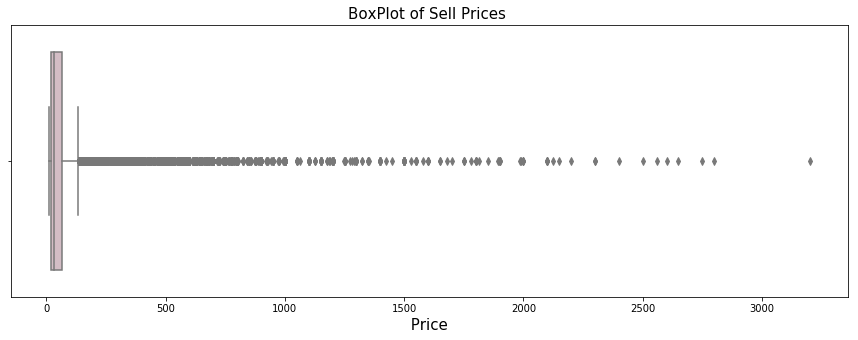

In [17]:
#Boxplot for selling price by brand
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_price', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There are many outliers

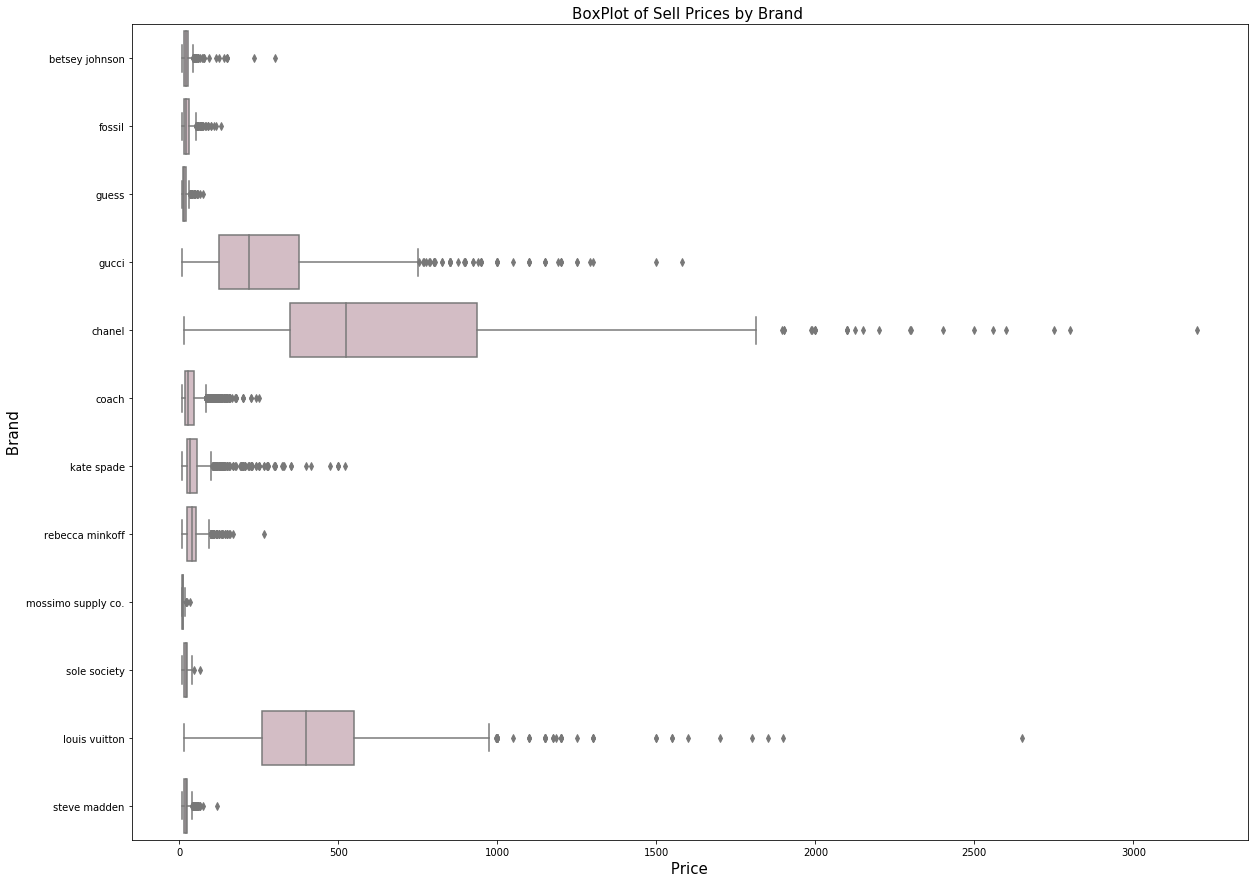

In [18]:
#Boxplot for selling price by brand
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x='sell_price', y='brand', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices by Brand ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.ylabel(' Brand ', fontsize=15)
plt.show()
#There are many outliers, will check again and omit them.

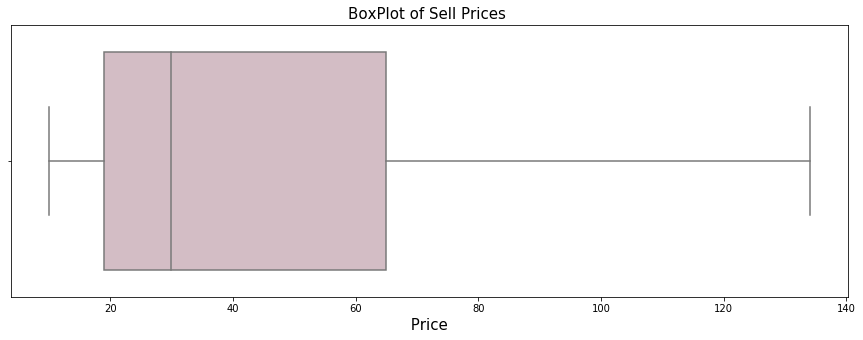

In [19]:
#Boxplot for selling price by brand No fliers
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='sell_price', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
# 75% of the data has a sell price between $0-65

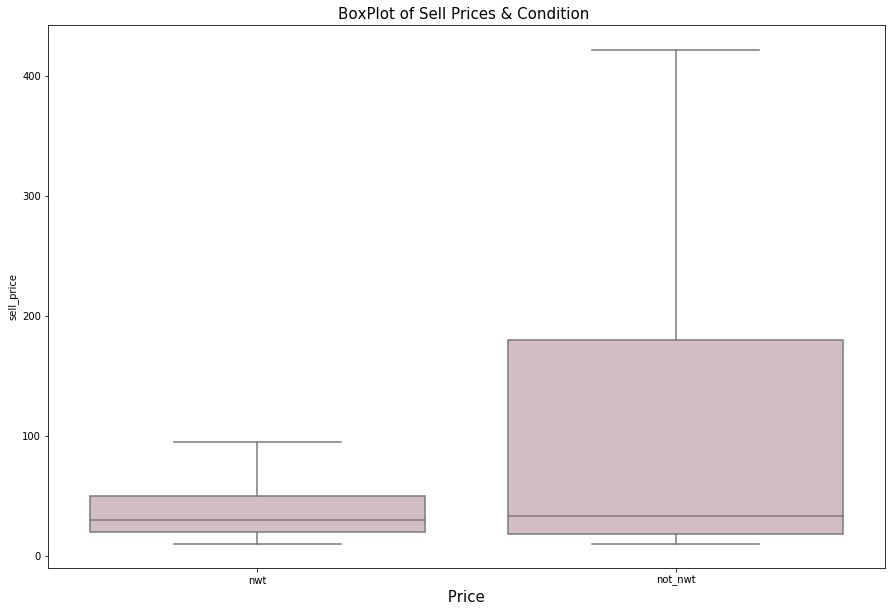

In [20]:
#Boxplot for sell price and condition
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y='sell_price', x='condition', data=cond_df, showfliers=False, color='#D7B9C4')
plt.title("BoxPlot of Sell Prices & Condition ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There is a relationship between condition and sell price

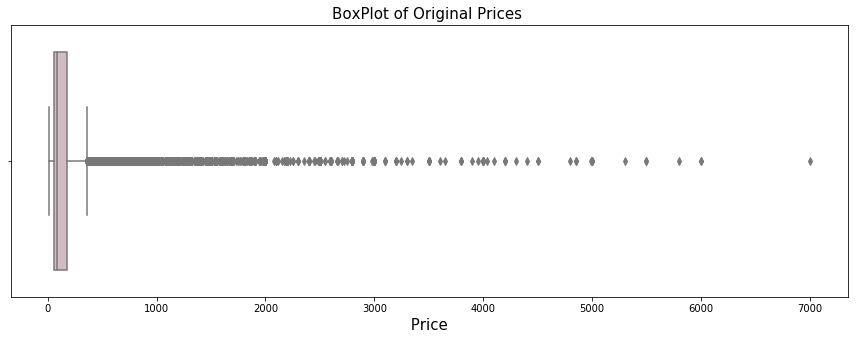

In [21]:
#Boxplot for original price by brand
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x='og_price', data=cond_df, showfliers=True, color='#D7B9C4')
plt.title("BoxPlot of Original Prices ", fontsize=15)
plt.xlabel(' Price ', fontsize=15)
plt.show()
#There are many outliers

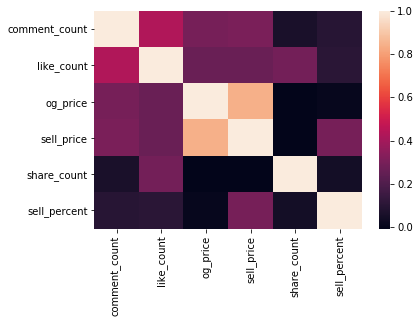

In [22]:
#Correlation matrix
# check for any correlations between variables
corr = cond_df.corr()
sns.heatmap(corr)
#No high correlation between independent variables

In [ ]:
#
# Data Transformation
#

In [23]:
#Create dataframe for regression analysis: id, brand, og_price, sell_price, and condition
reg_df = cond_df[['_id', 'brand', 'og_price', 'sell_price', 'condition']].copy()

In [24]:
#Boxcox transformation for original and sell price because they skew to the right
from scipy.special import boxcox, inv_boxcox

#Lambda value
ld = -0.002

reg_df['og_price']  = boxcox(reg_df['og_price'],ld)
reg_df['sell_price'] = boxcox(reg_df['sell_price'],ld)
reg_df.tail(5)

,_id,brand,og_price,sell_price,condition
50839,606b3a366b53b4fd918cbcc4,steve madden,3.769906,3.208537,nwt
50840,606b3a366b53b4fd918cbcc5,steve madden,4.044000,3.624386,nwt
50841,606b3a366b53b4fd918cbcc6,steve madden,4.044000,3.208537,nwt
50843,606b3a366b53b4fd918cbcc8,steve madden,4.044000,3.208537,nwt
50844,606b3a366b53b4fd918cbcc9,steve madden,4.044000,3.389655,nwt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016094256F28>]],
      dtype=object)

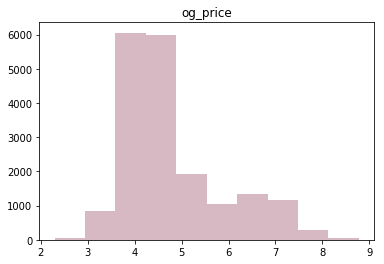

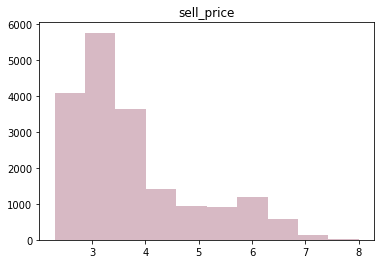

In [25]:
#Verify shape after transformation
#Hist plosts for original and sell price
reg_df.hist(column='og_price', color='#D7B9C4', grid=False)
reg_df.hist(column='sell_price', color='#D7B9C4', grid=False)
#Right-skewed

In [26]:
#Encode categorical features (brand and condition) for regression
labelencoder = LabelEncoder()

#Encode brands
reg_df['brand'] = labelencoder.fit_transform(reg_df['brand'])

#Encode condition
reg_df['condition'] = labelencoder.fit_transform(reg_df['condition'])

reg_df.tail(5)

,_id,brand,og_price,sell_price,condition
50839,606b3a366b53b4fd918cbcc4,11,3.769906,3.208537,1
50840,606b3a366b53b4fd918cbcc5,11,4.044000,3.624386,1
50841,606b3a366b53b4fd918cbcc6,11,4.044000,3.208537,1
50843,606b3a366b53b4fd918cbcc8,11,4.044000,3.208537,1
50844,606b3a366b53b4fd918cbcc9,11,4.044000,3.389655,1


In [27]:
#Separate features and target into y and x variables
y = reg_df['sell_price']
x = reg_df[['brand', 'og_price', 'condition']]
X = sm.add_constant(x)
ols_mod = sm.OLS(y,X).fit()
ols_mod.summary()
#Kurtosis and Skew values look much better after the Box-Cox transformation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sell_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 3.370e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:39:51   Log-Likelihood:                -11932.
No. Observations:               18699   AIC:                         2.387e+04
Df Residuals:                   18695   BIC:                         2.390e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3707      0.018    -75.416      0.000      -1.406      -1.335
brand          0.0080      0.001      8.270      0.000       0.006       0.010
og_price       1.0200      0.003    312.742      0.000       1.014       1.026
condition      0.3235      0.007     45.192      0.000       0.309       0.338
==============================================================================
Omnibus:                        8.879   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.939
Skew:                          -0.045   Prob(JB):                       0.0115
Kurtosis:                       3.058   Cond. No.                         41.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#
# Predict
#

In [28]:
import numpy as np

In [63]:
def rec_price(brand, og, cond, ld):
    box_val = boxcox(og, ld)
    #Add 1 for constant to include 1 intercept value
    const = 1.0
    x_new = [const, brand, box_val, cond]
    pred = ols_mod.predict(x_new)
    pred = inv_boxcox(pred, ld)
    return pred

In [64]:
#Recommend price for brand 5, original price of $500, with condition of 1
rec1 = rec_price(5, 500, 1, ld)
print(rec1)

[204.50084358]


In [65]:
#Recommend price for brand 1, original price of $75, with condition of 0
rec2 = rec_price(1, 75, 0, ld)
print(rec2)

[20.7228614]
